In [1]:
import numpy as np
from scipy.constants import k
import matplotlib.pyplot as plt
import time
from tqdm.auto import tqdm

%config InlineBackend.figure_formats = ['svg']

In [2]:
I_b = 1e-6
L = 1
R = 1
T = 1
tau = L/R
c = 2*k*T*R/L**2

dI = lambda I, delta_t: - (I - I_b)/tau + np.sqrt(c)*np.random.normal(scale=np.sqrt(delta_t))

def eulmaj(dX, t, X0, *args):
    assert len(t.shape) == 1, ''
    X = np.zeros(t.shape)
    X[0] = X0
    print(X[0])
    print(dX(X[0], t[1] - t[0], *args))
    for i,t_ in tqdm(enumerate(t[1:]), total=t.shape[0] - 1):
        X[i+1] = X[i] + dX(X[i], t[i+1] - t[i], *args)
    return X

In [3]:
dt = .00004
record_length = 16384
nmbr_records = 10
steps = record_length * nmbr_records
t = np.arange(0,dt*steps, dt)

In [4]:
I = eulmaj(dX=dI, t=t, X0=I_b)

1e-06
1.7549287125716942e-14


  0%|          | 0/163839 [00:00<?, ?it/s]

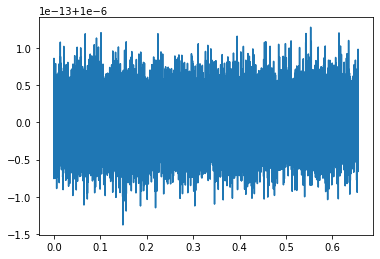

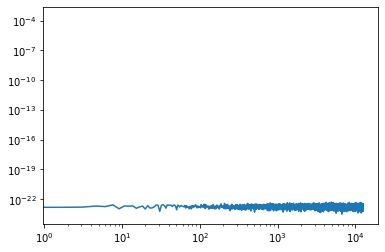

In [5]:
t = t.reshape(-1,record_length)
I = I.reshape(-1,record_length)

plt.plot(t[0],I[0])
plt.show()

freq = np.fft.rfftfreq(t.shape[1], dt)
nps = np.mean(np.abs(np.fft.rfft(I, axis=-1))**2, axis=0)
plt.loglog(freq, nps)
plt.show()

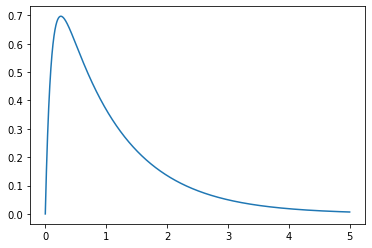

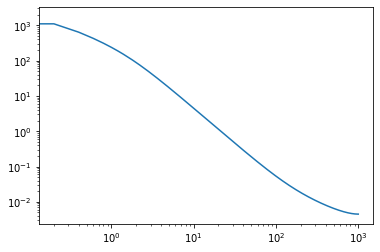

In [57]:
pulse = lambda t, amp, t0, t_rise, t_decay: np.heaviside(t-t0,0)*amp*(np.exp(-(t-t0)/t_decay) - np.exp(-(t-t0)/t_rise)) 

x = np.linspace(0,5,10000)
dx = x[1] - x[0]  
y = pulse(x, 1, 0., .1, 1)

plt.plot(x, y)
plt.show()

freq = np.fft.rfftfreq(x.shape[-1], dx)
fouriert = np.fft.rfft(y, axis=-1)
# nps = np.mean(np.abs(fouriert)**2, axis=0)
plt.loglog(freq, np.abs(fouriert))
plt.show()

$\frac{1}{1/t_{decay} + i w} - \frac{1}{1/t_{rise} + i w}$

$(\frac{1}{1/t_{decay} + i w} - \frac{1}{1/t_{rise} + i w})(\frac{1}{1/t_{decay} - i w} - \frac{1}{1/t_{rise} - i w})$

$\frac{1}{1/t_{decay} + i w}\frac{1}{1/t_{decay} - i w} - \frac{1}{1/t_{decay} + i w}\frac{1}{1/t_{rise} - i w} - \frac{1}{1/t_{rise} + i w}\frac{1}{1/t_{decay} - i w} + \frac{1}{1/t_{rise} + i w}\frac{1}{1/t_{rise} - i w}$

$\frac{1}{1/t_{decay}^2 + w^2}$ + $\frac{1}{1/t_{rise}^2 + w^2}$

SDE:
    
$dX = f(X,t)dt + g(X)dB$

Thermometer model: 

$dT = \frac{1}{C} ( (R_t (1 + \Lambda dB_0) I_t^2 + E_r\exp(- t / \tau_{in}) - G_b (T - T_b))dt + \mathbf{P_{n,th}}dB_1)$

Readout circuit: 

$dI_t = \frac{1}{L} (R_s I_b - I_t (R_t (1 + \Lambda dB_0) + R_s))dt + (\mathbf{\frac{U_{n,t}}{R_t} - \mathbf{\frac{U_{n,s}}{R_s}} - I_{n,sq}})dB_3$

$P_{n,th} = \sqrt{4 k_B T^2 G_b \frac{ 1 - (\frac{T_b}{T})^5 }{ 1 - (\frac{T_b}{T})^2 }}$

$U_{n,t} = \sqrt{4 k_b T R_t}$

$U_{n,s} = \sqrt{4 k_b T_b R_s}$

In [13]:
const = {
    'L': 1,
    'C': 1,
    'Tc': 1,
    'Rt0': 1,
    'flucts': 1e-3,
    'Er': 0,
    'tau_in': 1e-3,
    'Gb': 1,
    'Tb': 1,
    'Rs': 1,
    'Ib': 1,
}
const['R_t'] = lambda T: Rt0*(T/T_c)

In [ ]:
def f(X, t, const):  # (T, It)
    
    
def g(X, const):  # (T, It)
    
    

$I = U/R $

$ dI = \sqrt{4 k_B T /R} dB$


In [23]:
dT = 4e-5
T = 0.01
R = 0.1
U = 1e-7

I = U / R

start = time.time()
noise = []
for i in range(16384):
    I += np.sqrt(4 * k * T / R) * np.random.normal(scale = dT)
    noise.append(I)
noise = np.array(noise)
print(time.time() - start)

0.07739901542663574


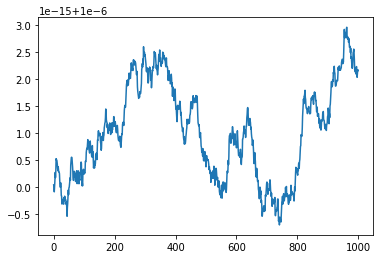

In [12]:
plt.plot(noise)